#**Natural Language Processing : Sentiment Analysis**
This is a sentiment analysis program that parses the tweets fetched from Twitter using Python.

by : Sarah BOUARABA - Insaf MEDJAOURI

2nd year DSIA (2021-2022)

In [ ]:
#Import libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data : Please upload your credentials' csv file
from google.colab import files
uploaded = files.upload()

Saving LoginS.csv to LoginS (2).csv


In [ ]:
#Read the data
log = pd.read_csv('LoginS.csv')

#**Data Collection**

In [ ]:
#Twitter API credentials

consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]




In [ ]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and the access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object while passing in the authenticate information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
#Extract 100 tweets from the tweeter user
posts = api.user_timeline(screen_name = "BillGates", count = 100, lang = "en", tweet_mode = "extended")

#Print the last 5 tweets from the account
print("Show the 5 recent tweets : \n")

i = 1
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets : 

1).@WalterIsaacson is one of my favorite authors. I was eager to read his latest book about CRISPR and its inventor Jennifer Doudna: https://t.co/qD9QASvwHx https://t.co/ZiWiKjVjCq

2)Heroes like @PumlaNtlabati are spreading important information, and hope, across South Africa with the help of an unusual and innovative tool: https://t.co/vBSMvpv6Lt https://t.co/euBp7fM2PF

3)We have some, but not all, of the tools we need to hit our target of limiting global warming to less than 2 degrees. We need to prioritize closing that gap if we’re going to avoid a climate disaster: https://t.co/h6wqiZVgph https://t.co/Mj3df3OVl0

4)The world has lost a hero. Archbishop Desmond Tutu led with his values, empathy and optimism. He put everyone he met at ease with his incredible laugh and energy. He inspired me with his sense of purpose to build peace out of the struggle of oppression. I will miss him greatly.

5)One of my favorite holiday traditions is sharing books with 

#**Data Pre-processing**

In [ ]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns = ['Tweets'] )

#Show the first 5 rows of data
df.head()

,Tweets
0,.@WalterIsaacson is one of my favorite authors...
1,Heroes like @PumlaNtlabati are spreading impor...
2,"We have some, but not all, of the tools we nee..."
3,The world has lost a hero. Archbishop Desmond ...
4,One of my favorite holiday traditions is shari...


In [ ]:
#Clean the text

#Create a fonction to clean the tweets

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)   #Removing @mentions
  text = re.sub(r'#', '', text)   #Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text)   #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text)   #Removing the hyper link

  return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt) 

#Show the cleaned text
df

,Tweets
0,. is one of my favorite authors. I was eager t...
1,Heroes like are spreading important informati...
2,"We have some, but not all, of the tools we nee..."
3,The world has lost a hero. Archbishop Desmond ...
4,One of my favorite holiday traditions is shari...
...,...
95,I wrote about two ways to achieve vaccine equi...
96,"Still, the disparities in access to the COVID-..."
97,"Inequity in health is not new. Each year, more..."
98,The pandemic has worsened inequities. But it's...


In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,. is one of my favorite authors. I was eager t...,0.950000,0.500000
1,Heroes like are spreading important informati...,1.000000,0.366667
2,"We have some, but not all, of the tools we nee...",0.033333,-0.083333
3,The world has lost a hero. Archbishop Desmond ...,0.583333,0.666667
4,One of my favorite holiday traditions is shari...,0.900000,0.600000
...,...,...,...
95,I wrote about two ways to achieve vaccine equi...,0.341601,0.214286
96,"Still, the disparities in access to the COVID-...",0.650000,-0.250000
97,"Inequity in health is not new. Each year, more...",0.459091,0.321970
98,The pandemic has worsened inequities. But it's...,1.000000,0.000000


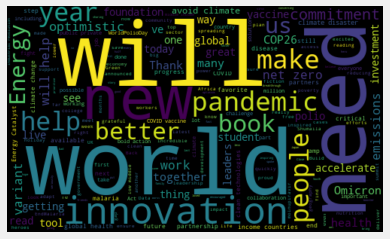

In [ ]:
#Plot the word cloud

all_words = ' '.join( [twts for twts in df['Tweets']] )
word_cloud = WordCloud( width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative, neutral & positive analysis

def getAnalysis(score):
  if score < 0: 
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else :
    return 'Positive'

#Create a new column
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,. is one of my favorite authors. I was eager t...,0.950000,0.500000,Positive
1,Heroes like are spreading important informati...,1.000000,0.366667,Positive
2,"We have some, but not all, of the tools we nee...",0.033333,-0.083333,Negative
3,The world has lost a hero. Archbishop Desmond ...,0.583333,0.666667,Positive
4,One of my favorite holiday traditions is shari...,0.900000,0.600000,Positive
...,...,...,...,...
95,I wrote about two ways to achieve vaccine equi...,0.341601,0.214286,Positive
96,"Still, the disparities in access to the COVID-...",0.650000,-0.250000,Negative
97,"Inequity in health is not new. Each year, more...",0.459091,0.321970,Positive
98,The pandemic has worsened inequities. But it's...,1.000000,0.000000,Neutral


In [ ]:
#Print all the positive tweets

j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1). is one of my favorite authors. I was eager to read his latest book about CRISPR and its inventor Jennifer Doudna:  

2)Heroes like  are spreading important information, and hope, across South Africa with the help of an unusual and innovative tool:  

3)The world has lost a hero. Archbishop Desmond Tutu led with his values, empathy and optimism. He put everyone he met at ease with his incredible laugh and energy. He inspired me with his sense of purpose to build peace out of the struggle of oppression. I will miss him greatly.

4)One of my favorite holiday traditions is sharing books with family and friends. Here are 5 books I loved reading this year: 

5)Mamello Makhele is a hero from Lesotho who traveled by foot and donkey to bring health services to women in need during the pandemic. Her story is nothing short of inspiring:  

6)If there’s good news here, it’s that omicron moves so quickly that once it becomes dominant in a country, the wave there should last less than 3 months. 

In [ ]:
#Print all the negative tweets

j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1)We have some, but not all, of the tools we need to hit our target of limiting global warming to less than 2 degrees. We need to prioritize closing that gap if we’re going to avoid a climate disaster:  

2)I know it’s frustrating to go into another holiday season with COVID looming over us. But it won’t be like this forever. Someday the pandemic will end, and the better we look after each other, the sooner that time will come.

3)The big unknown is how sick omicron makes you. We need to take it seriously until we know more about it. Even if it’s only half as severe as delta, it will be the worst surge we have seen so far because it’s so infectious.

4)Just when it seemed like life would return to normal, we could be entering the worst part of the pandemic. Omicron will hit home for all of us. Close friends of mine now have it, and I’ve canceled most of my holiday plans.

5)The Omicron variant is concerning, but the world is better prepared to tackle potentially bad variants than at an

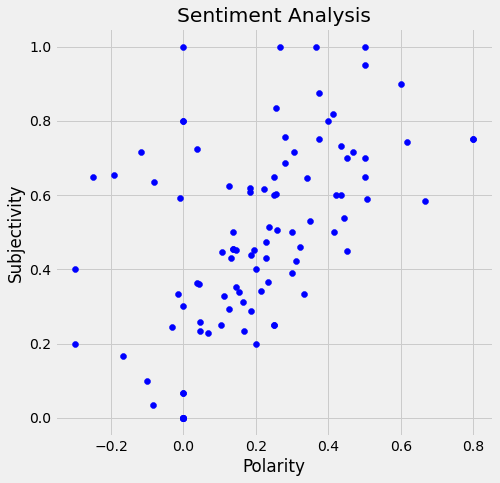

In [ ]:
#Plot the polarity and subjectivity

plt.figure(figsize=(7,7))
for i in range(0, df.shape[0]):
  plt.scatter( df['Polarity'][i], df['Subjectivity'][i], color='Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#Get the percentage of positive tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round(  (ptweets.shape[0] / df.shape[0]) *100 , 1  )

74.0

In [ ]:
#Get the percentage of negative tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round(  (ntweets.shape[0] / df.shape[0]) *100 , 1  )

12.0

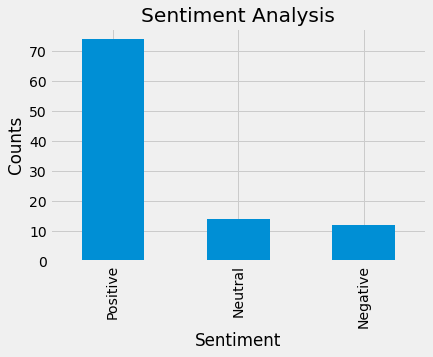

In [ ]:
#Show the value counts
df['Analysis'].value_counts()

#Plot & visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()